# Pips and imports

In [ ]:
%pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
%pip install pandas==1.3.3 pytorch-fid==0.2.1
%pip install wandb

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as F_
import numpy as np
import os
import PIL

from torchvision import transforms

In [2]:
#from generator import *
#from discriminator import *
#from losses import *
#from training import *
#from dataset import *
from pix2pix import *

In [3]:
from utils_real_fake import *

# Dataset



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_batch_size, val_batch_size, test_batch_size = 1,1,1

train_transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

val_transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])
#Путь для Колаба
train_dataset = ImageTrainDataSet('/content/drive/MyDrive/funkopop_gan/facades_dataset/train', transform=train_transform, aug=False)
val_dataset = ImageTrainDataSet('/content/drive/MyDrive/funkopop_gan/facades_dataset/test', transform=val_transform, aug=False)


train_loader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=train_batch_size)


val_loader = torch.utils.data.DataLoader(
    val_dataset,
    shuffle=True,
    batch_size=val_batch_size)



# Training without discriminator



In [10]:
#!g1.1
#wandb.init(project='funkopops L1')
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
g = UNetModel().to(DEVICE)

g_opt = torch.optim.Adam(g.parameters(), lr=0.0002, betas=(0.5, 0.999))

train_g(g,
          n_epochs=10,
          generator_opt=g_opt,

          train_loader=train_loader,
          val_loader=val_loader,
          num_model=1234567,

          logging=False,
          path_last_epoch='try_',
          path_best_model = 'best_try'
          )

100%|██████████| 400/400 [00:29<00:00, 13.45it/s]



epoch 0/10 0.3961242594197392


100%|██████████| 106/106 [00:34<00:00,  3.11it/s]



validation 0/10 0.37957098686470175


100%|██████████| 400/400 [00:25<00:00, 15.61it/s]



epoch 1/10 0.36125777062028647


100%|██████████| 106/106 [00:02<00:00, 36.98it/s]



validation 1/10 0.37448308195145624


100%|██████████| 400/400 [00:25<00:00, 15.53it/s]



epoch 2/10 0.3479988954216242


100%|██████████| 106/106 [00:02<00:00, 36.69it/s]



validation 2/10 0.36387825504226506


100%|██████████| 400/400 [00:25<00:00, 15.39it/s]



epoch 3/10 0.33951138235628603


100%|██████████| 106/106 [00:02<00:00, 36.50it/s]



validation 3/10 0.35731875713703765


100%|██████████| 400/400 [00:26<00:00, 15.28it/s]



epoch 4/10 0.33046736016869543


100%|██████████| 106/106 [00:02<00:00, 36.61it/s]



validation 4/10 0.3520496683019512


100%|██████████| 400/400 [00:26<00:00, 15.19it/s]



epoch 5/10 0.3221316340193152


100%|██████████| 106/106 [00:02<00:00, 36.33it/s]



validation 5/10 0.3512174629096715


100%|██████████| 400/400 [00:26<00:00, 15.12it/s]



epoch 6/10 0.3157648050412536


100%|██████████| 106/106 [00:02<00:00, 36.16it/s]



validation 6/10 0.35126683692324834


100%|██████████| 400/400 [00:26<00:00, 15.07it/s]



epoch 7/10 0.3063071274757385


100%|██████████| 106/106 [00:02<00:00, 35.53it/s]



validation 7/10 0.3465677948211724


100%|██████████| 400/400 [00:26<00:00, 15.04it/s]



epoch 8/10 0.2969963051378727


100%|██████████| 106/106 [00:02<00:00, 35.45it/s]



validation 8/10 0.34353901333404036


100%|██████████| 400/400 [00:26<00:00, 15.00it/s]



epoch 9/10 0.28872335951775313


100%|██████████| 106/106 [00:03<00:00, 34.74it/s]



validation 9/10 0.3418389891959586


In [11]:
torch.save(g.state_dict(), '/content/drive/MyDrive/funkopop_gan/models/facades_only_generator.pt')

# Testing baseline


In [12]:
g = UNetModel()
g.load_state_dict(torch.load('/content/best_try1234567.pt'))

<All keys matched successfully>

In [13]:
list_val = list(val_loader)

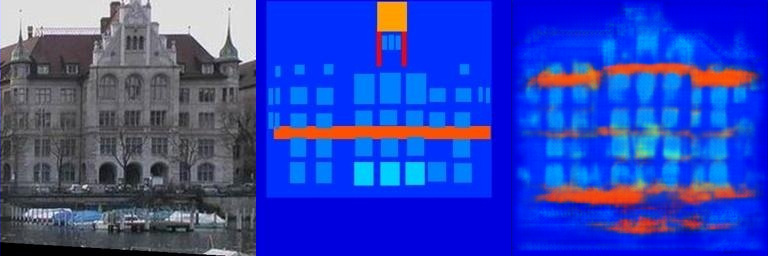

In [14]:
x_try, y_try = list_val[9]
depict_input_real_fake(g, x_try, y_try, norm=True)

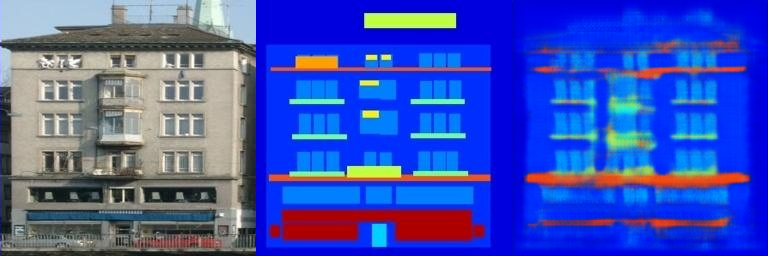

In [15]:
x_try, y_try = list_val[90]
depict_input_real_fake(g, x_try, y_try, norm=True)

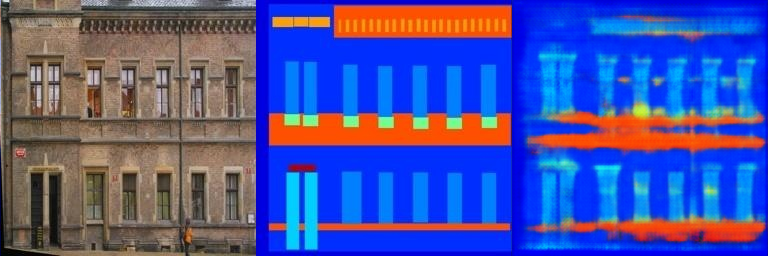

In [16]:
x_try, y_try = list_val[56]
depict_input_real_fake(g, x_try, y_try, norm=True)

# Final model

In [6]:

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

g = UNetModel()
d = Discriminator()

g_opt = torch.optim.Adam(g.parameters(), lr=0.0002, betas=(0.5, 0.999))
d_opt = torch.optim.Adam(d.parameters(), lr=0.0002, betas=(0.5, 0.999))

train(g,
          d,
          n_epochs=5,
          generator_opt=g_opt,
          discriminator_opt=d_opt,
          train_loader=train_loader,
          val_loader=val_loader,
          num_model=701,
          logging=False,
          path_last_epoch='/content/drive/MyDrive/funkopop_gan/models/facades'
          )

100%|██████████| 400/400 [00:39<00:00, 10.22it/s]



epoch 0/5 g loss 43.18970704078674 d_loss 0.5976928447559476


100%|██████████| 106/106 [00:03<00:00, 31.73it/s]



val 0/5 g loss 41.216524178127074 d_loss 0.4659626429443652


100%|██████████| 400/400 [00:39<00:00, 10.19it/s]



epoch 1/5 g loss 40.043054056167605 d_loss 0.5631864929944277


100%|██████████| 106/106 [00:03<00:00, 32.32it/s]



val 1/5 g loss 42.221877062095786 d_loss 0.6462238831621296


100%|██████████| 400/400 [00:39<00:00, 10.10it/s]



epoch 2/5 g loss 39.25735559463501 d_loss 0.5432780837966129


100%|██████████| 106/106 [00:03<00:00, 32.22it/s]



val 2/5 g loss 39.2318095621073 d_loss 0.558038380840477


100%|██████████| 400/400 [00:39<00:00, 10.04it/s]



epoch 3/5 g loss 38.7466045999527 d_loss 0.47818399718264115


100%|██████████| 106/106 [00:03<00:00, 30.87it/s]



val 3/5 g loss 38.623013820288314 d_loss 1.4963755166193224


100%|██████████| 400/400 [00:40<00:00,  9.99it/s]



epoch 4/5 g loss 38.04497632980347 d_loss 0.532189814178273


100%|██████████| 106/106 [00:03<00:00, 30.79it/s]


val 4/5 g loss 41.8581347735423 d_loss 0.6373526256373327


# Testing final model

In [7]:
g = UNetModel()

g.load_state_dict(torch.load('/content/drive/MyDrive/funkopop_gan/models/facades/gen_701.pt'))

<All keys matched successfully>

In [8]:
list_val = list(val_loader)

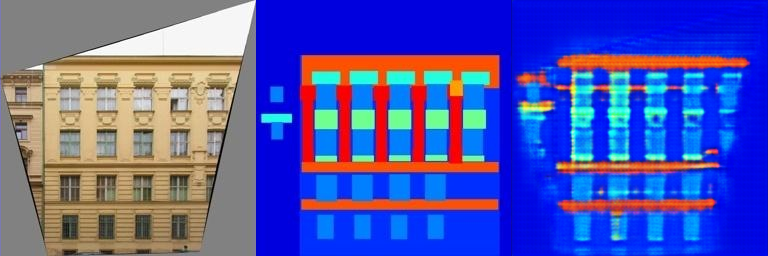

In [9]:
x_try, y_try = list_val[56]
depict_input_real_fake(g, x_try, y_try, norm=True)

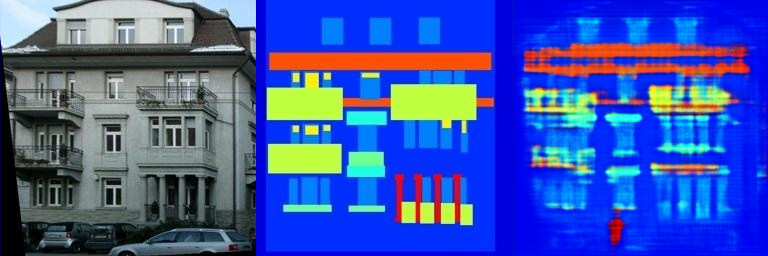

In [10]:
x_try, y_try = list_val[9]
depict_input_real_fake(g, x_try, y_try, norm=True)

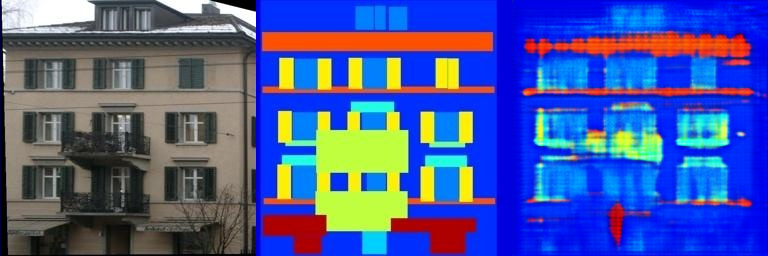

In [12]:
x_try, y_try = list_val[89]
depict_input_real_fake(g, x_try, y_try, norm=True)

Problems with balconies. But overall for only 5 epochs is OK

We can check for train

In [13]:
list_train = list(train_loader)

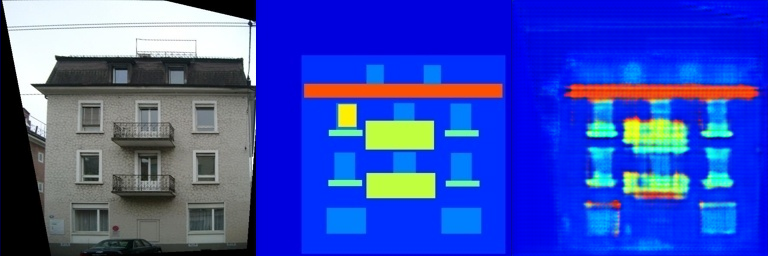

In [17]:
x_try, y_try = list_train[189]
depict_input_real_fake(g, x_try, y_try, norm=True)